In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
connection = sqlite3.connect('dinofunworld.db')
cursor = connection.cursor()

def get_attraction_id(cursor, attraction_name):
    cursor.execute("SELECT attractionId FROM attraction WHERE Name = ?;", (attraction_name,))
    return cursor.fetchone()[0]

def get_sequences(cursor, attraction_id):
    cursor.execute("SELECT visitorID, sequence FROM sequences WHERE sequence LIKE ?;", ('%' + str(attraction_id) + '%',))
    return cursor.fetchall()

def process_sequences(sequences, attraction_id):
    sequence_stats = pd.DataFrame.from_records(sequences, columns=['visitor', 'sequence'])
    sequence_stats['sequence_list'] = sequence_stats['sequence'].apply(lambda a: [1 if x == str(attraction_id) else 0 for x in a.split("-")])
    return np.sum(sequence_stats['sequence_list'].values.tolist(), axis=0)

attraction_name = 'Atmosfear'
attraction_id = get_attraction_id(cursor, attraction_name)

sequences = get_sequences(cursor, attraction_id)
attendance = process_sequences(sequences, attraction_id)

sequence_time_update_minutes = 5

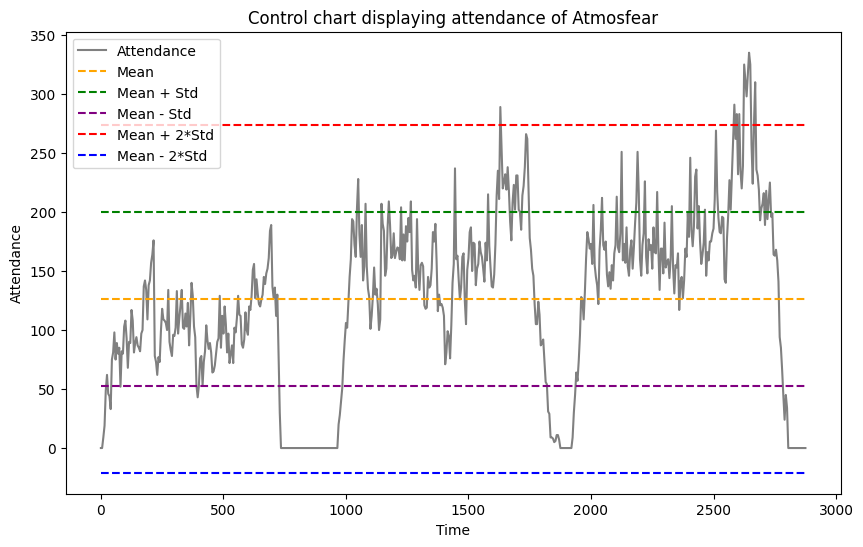

In [4]:
# Task 1: Create a control chart displaying the attendance, the mean,
# and the standard deviation bands at one and two standard deviations.

def plot_chart(x_axis, attendance, mean, std):
    plt.figure(figsize=(10,6))
    plt.plot(x_axis, attendance, color='grey', linestyle='-', label='Attendance')
    plt.plot(x_axis, [mean]*len(attendance), color='orange', linestyle='dashed', label='Mean')
    plt.plot(x_axis, [mean+std]*len(attendance), color='green', linestyle='dashed', label='Mean + Std')
    plt.plot(x_axis, [mean-std]*len(attendance), color='purple', linestyle='dashed', label='Mean - Std')
    plt.plot(x_axis, [mean+2*std]*len(attendance), color='red', linestyle='dashed', label='Mean + 2*Std')
    plt.plot(x_axis, [mean-2*std]*len(attendance), color='blue', linestyle='dashed', label='Mean - 2*Std')
    plt.ylabel('Attendance')
    plt.xlabel('Time')
    plt.title('Control chart displaying attendance of Atmosfear')
    plt.legend(loc='upper left')
    plt.show()

def main1():
    mean = np.nanmean(attendance)
    std = np.nanstd(attendance)
    x_axis = range(0, len(attendance)*sequence_time_update_minutes, sequence_time_update_minutes)

    plot_chart(x_axis, attendance, mean, std)

main1()


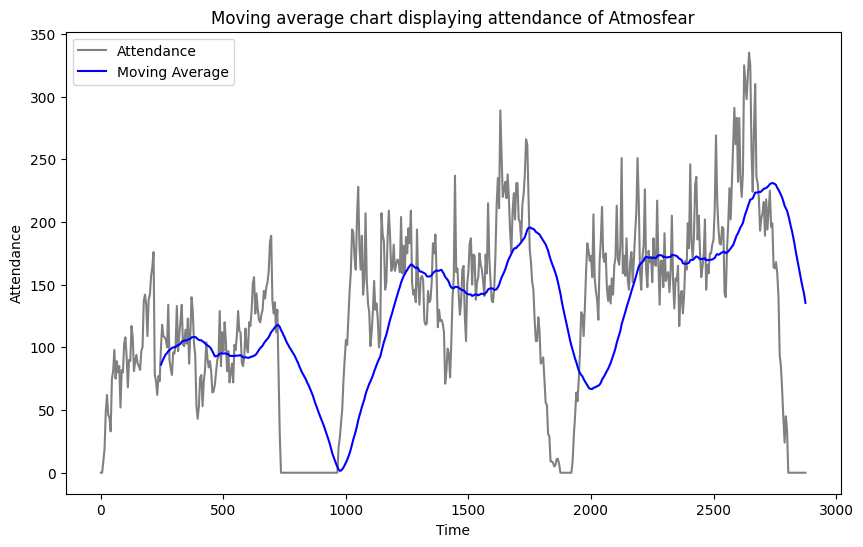

In [5]:
# Task 2: Provide a moving average chart of the attendance, use 50 samples
# for the size of the moving average

def calculate_moving_average(data, window_size):
    return data.rolling(window=window_size).mean()

def plot_moving_average_chart(x_axis, attendance, moving_average):
    plt.figure(figsize=(10,6))
    plt.plot(x_axis, attendance, color='grey', linestyle='-', label='Attendance')
    plt.plot(x_axis, moving_average, color='blue', linestyle='-', label='Moving Average')
    plt.ylabel('Attendance')
    plt.xlabel('Time')
    plt.title('Moving average chart displaying attendance of Atmosfear')
    plt.legend(loc='upper left')
    plt.show()

def main2():
    x_axis = range(0, len(attendance)*sequence_time_update_minutes, sequence_time_update_minutes)

    attendance_series = pd.Series(attendance)
    moving_average = calculate_moving_average(attendance_series, 50)
    plot_moving_average_chart(x_axis, attendance, moving_average)

main2()


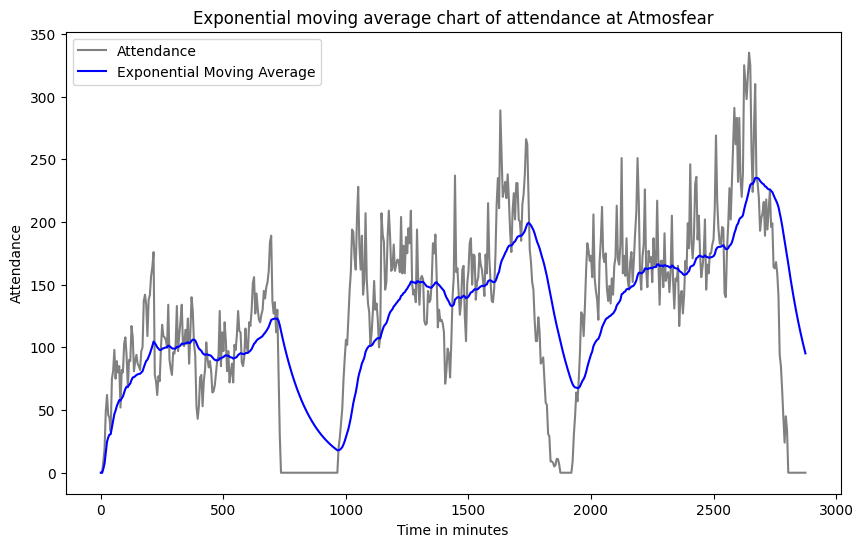

In [6]:
# Task 3: Provide a 50-sample moving average window with the average computed
# with exponential weighting

def calculate_exponential_moving_average(data, window_size):
    return data.ewm(span=window_size).mean()

def plot_exponential_moving_average_chart(x_axis, attendance, exponential_moving_average):
    plt.figure(figsize=(10,6))
    plt.plot(x_axis, attendance, color='grey', linestyle='-', label='Attendance')
    plt.plot(x_axis, exponential_moving_average, color='blue', linestyle='-', label='Exponential Moving Average')
    plt.ylabel('Attendance')
    plt.xlabel('Time in minutes')
    plt.title('Exponential moving average chart of attendance at Atmosfear')
    plt.legend(loc='upper left')
    plt.show()

def main3():
    x_axis = range(0, len(attendance)*sequence_time_update_minutes, sequence_time_update_minutes)

    attendance_series = pd.Series(attendance)
    exponential_moving_average = calculate_exponential_moving_average(attendance_series, 50)
    plot_exponential_moving_average_chart(x_axis, attendance, exponential_moving_average)

main3()